# Data Loading and Preprocessing

In [1]:
import tensorflow as tf
import os

In [2]:
#!pip list

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [4]:
'''
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
'''

"\ngpus = tf.config.experimental.list_physical_devices('GPU')\nfor gpu in gpus:\n    tf.config.experimental.set_memory_growth(gpu, True)\n"

In [5]:
device_name = tf.test.gpu_device_name()

In [6]:
import cv2
import pandas as pd
import numpy as np

In [7]:
train_dir = os.path.join('data', 'train')
test_dir = os.path.join('data', 'test')

In [8]:
print(train_dir)
print(test_dir)

data\train
data\test


In [9]:
img_size = 48
row, col = 48, 48
classes = 7

In [10]:
os.listdir(train_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [11]:
def count_moods(path, set_):
    d = {}
    for mood in os.listdir(path):
        dir_ = os.path.join(path, mood)
        d[mood] = len(os.listdir(dir_))
    df = pd.DataFrame(d, index=[set_])
    return df

train_count = count_moods(train_dir, 'train')
test_count = count_moods(test_dir, 'test')

In [12]:
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<AxesSubplot:>

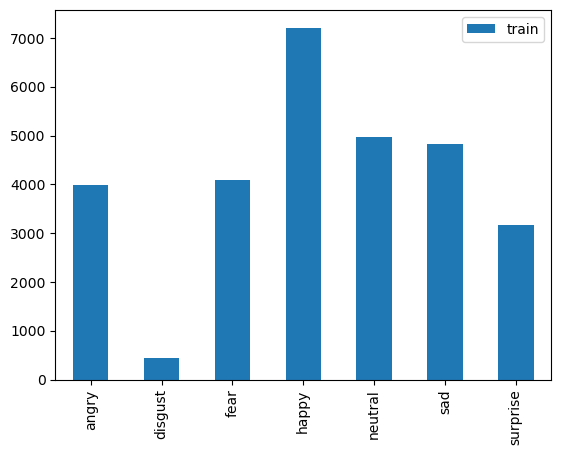

In [13]:
train_count.transpose().plot(kind='bar')

<AxesSubplot:>

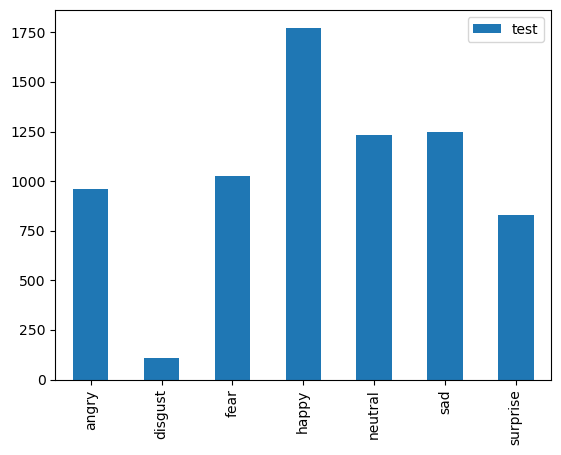

In [14]:
test_count.transpose().plot(kind='bar')

In [15]:
img = cv2.imread(os.path.join(train_dir, 'angry', 'Training_3908.jpg'))
img.shape

(48, 48, 3)

In [16]:
from matplotlib import pyplot as plt

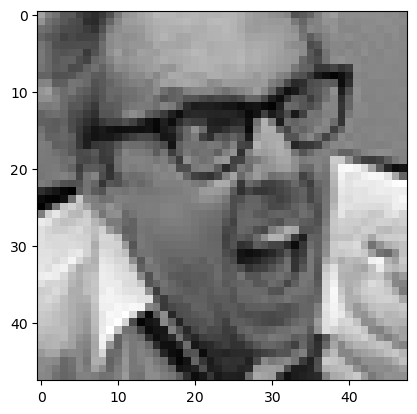

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
import seaborn as sns

In [19]:
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax

# Creating Training and Validation Sets

In [22]:
train_data_gen = ImageDataGenerator(horizontal_flip = True,
                                    rescale = 1./255,
                                    zoom_range=0.3)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_set = train_data_gen.flow_from_directory(train_dir, 
                                                target_size = (img_size, img_size),
                                                batch_size = 64,
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical',
                                                shuffle=True)

test_set = test_data_gen.flow_from_directory(test_dir, 
                                                target_size = (img_size, img_size),
                                                batch_size = 64,
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical',
                                                shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [24]:
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# CNN Layers

In [25]:
'''
def get_model(input_size):
    
    model = tf.keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer = Adam(learning_rate=0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
                 
    return model
'''

"\ndef get_model(input_size):\n    \n    model = tf.keras.models.Sequential()\n\n    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))\n    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))\n    model.add(BatchNormalization())\n    model.add(MaxPool2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25))\n\n    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))\n    model.add(BatchNormalization())\n    model.add(MaxPool2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25))\n\n    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(.01)))\n    model.add(BatchNormalization())\n    model.add(MaxPool2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25))\n\n    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))\n    model.add(BatchNormalization())\n    model.add(MaxPool2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25

In [26]:
def get_model(input_size, classes=7):
    
    with tf.device(device_name):
      
      model = tf.keras.models.Sequential()
      
      model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_size))
      model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(2, 2))
      model.add(Dropout(0.25))
      
      model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
      model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(2, 2))
      model.add(Dropout(0.25))
      
      model.add(Flatten())
      model.add(Dense(1024, activation='relu'))
      model.add(Dropout(0.5))
      
      model.add(Dense(classes, activation='softmax'))

      model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
                 
    return model

# Model Overview

In [27]:
model = get_model((row, col, 1), classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [28]:
from keras.models import load_model

In [29]:
model_path = os.path.join('models', 'model.h5')
model = load_model(model_path)

# Defining Hyperparameters

In [30]:
epochs = 100

In [31]:
steps_per_epoch = train_set.n // train_set.batch_size
validation_steps = test_set.n // test_set.batch_size

# Checkpoints + Logs

In [32]:
import datetime
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau

In [33]:
check_path = os.path.join('models', 'model.h5')
log_dir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [34]:
checkpoint = ModelCheckpoint(filepath=check_path,
                            save_best_only=True,
                            verbose=1,
                            mode='min',
                            moniter='val_loss')

In [35]:
earlystop = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

In [36]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=6,
                             verbose=1,
                             min_delta=0.0001)

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
logger_path = os.path.join('logs', 'training.log')
csv_logger = CSVLogger(logger_path)
callbacks = [checkpoint, reduce_lr, csv_logger]

# Training CNN

In [38]:
'''
hist = model.fit(x=train_set,
                 validation_data=test_set,
                 epochs=epochs,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)
'''

'\nhist = model.fit(x=train_set,\n                 validation_data=test_set,\n                 epochs=epochs,\n                 callbacks=callbacks,\n                 steps_per_epoch=steps_per_epoch,\n                 validation_steps=validation_steps)\n'

In [39]:
model.save_weights(os.path.join('models', 'model_best_weight.h5'))

In [40]:
'''
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
'''

"\nplt.plot(hist.history['loss'])\nplt.plot(hist.history['val_loss'])\nplt.title('Loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper right')\n"

In [41]:
'''
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
'''

"\nplt.plot(hist.history['accuracy'])\nplt.plot(hist.history['val_accuracy'])\nplt.title('Accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper right')\n"

In [42]:
train_loss, train_acc = model.evaluate(train_set)
test_loss, test_acc = model.evaluate(test_set)
print('Final Test Accuracy = {:.2f}\nValidation Accuracy = {:.2f}'.format(train_acc * 100, test_acc * 100))

113/113 [==============================] - 12s 110ms/step - loss: 1.1109 - accuracy: 0.6640
Final Test Accuracy = 87.69
Validation Accuracy = 66.40


# Testing CNN

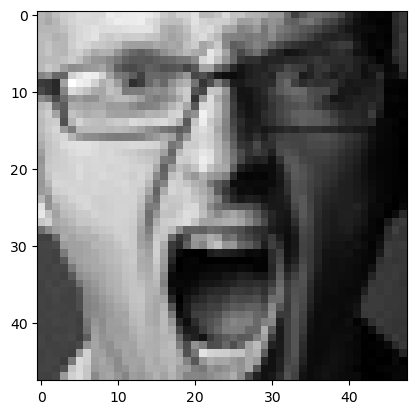

In [43]:
test_img_dir = os.path.join('data', 'test', 'angry', 'PrivateTest_13278552.jpg')
test_image = cv2.imread(test_img_dir, cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image, cmap='gray')
plt.show()

In [44]:
test_image = cv2.resize(test_image, (48, 48))
test_img = np.array(test_image)
test_img = test_img.reshape(1, 48, 48, 1)

In [45]:
def mood_from_label(label):
    labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    return labels[label]

In [46]:
predict_x = model.predict(test_img)
result = np.argmax(predict_x, axis=1)
print(mood_from_label(result[0]))

1/1 [==============================] - 0s 109ms/step
angry


# Testing on New Images

In [47]:
import time

In [55]:
'''
cap = cv2.VideoCapture(0)

time.sleep(3)
print('Collecting test image')
ret, frame = cap.read()
imgname = os.path.join('collectedImages', 'test_image6.jpg')
cv2.imwrite(imgname, frame)
cv2.imshow('frame', frame)

cap.release()
cv2.destroyAllWindows()
'''

"\ncap = cv2.VideoCapture(0)\n\ntime.sleep(3)\nprint('Collecting test image')\nret, frame = cap.read()\nimgname = os.path.join('collectedImages', 'test_image6.jpg')\ncv2.imwrite(imgname, frame)\ncv2.imshow('frame', frame)\n\ncap.release()\ncv2.destroyAllWindows()\n"

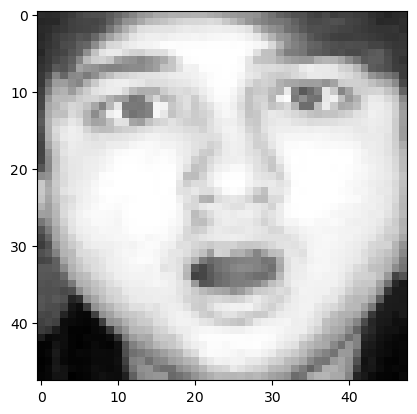

In [57]:
test_img_dir = os.path.join('collectedImages', 'test_image5.jpg')
test_image = cv2.imread(test_img_dir, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (48, 48))
plt.imshow(test_image, cmap='gray')
plt.show()

In [58]:
test_img = np.array(test_image)
test_img = test_img.reshape(1, 48, 48, 1)

In [59]:
predict_x = model.predict(test_img)
result = np.argmax(predict_x, axis=1)
print(mood_from_label(result[0]))

1/1 [==============================] - 0s 26ms/step
surprise


# Using Haar Cascade Frontal Face Model to Crop Input

In [60]:
img = cv2.imread(test_img_dir)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

haarscascade_dir = os.path.join('haarscascade', 'haarcascade_frontalface_alt2.xml')
face_cascade = cv2.CascadeClassifier(haarscascade_dir)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    cv2.imshow("Cropped", faces)
    cv2.imwrite(os.path.join('collectedImages', 'cropped', 'test_cropped.jpg'), faces)

cv2.imshow('Cropped Image', img)
cv2.waitKey()

-1

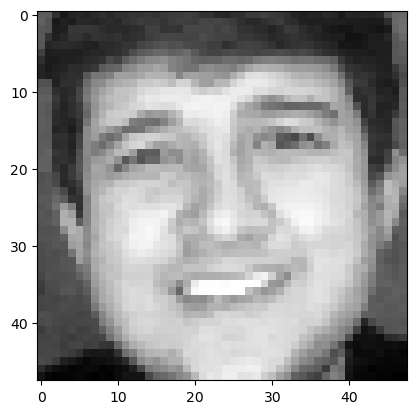

In [61]:
test_img_dir = os.path.join('collectedImages', 'cropped', 'test_cropped.jpg')
test_image = cv2.imread(test_img_dir, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (48, 48))
plt.imshow(test_image, cmap='gray')
plt.show()

In [62]:
test_img = np.array(test_image)
test_img = test_img.reshape(1, 48, 48, 1)

predict_x = model.predict(test_img)
result = np.argmax(predict_x, axis=1)
print(mood_from_label(result[0]))

1/1 [==============================] - 0s 28ms/step
happy
